In [6]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [10]:
iris = pd.read_csv('csv/iris.csv')
test_iris = pd.read_csv('csv/test_iris.csv')

In [11]:
iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [55]:
np.random.seed(0)
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=rp)

In [56]:
X_train = iris.drop(['Unnamed: 0','species'], axis=1)
X_test = test_iris.drop(['Unnamed: 0','species'], axis=1)

In [57]:
y_train = iris.species
y_test = test_iris.species

In [58]:
X_train

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
max_depth_values = range(1, 100)
scores = pd.DataFrame()

In [60]:
for i in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'depth' : [i], 'score_train' : [score_train], 'score_test':[score_test]})
    scores = scores.append(temp_score_data)

In [61]:
scores_data_long = pd.melt(scores, id_vars='depth', value_vars=['score_train', 'score_test'], 
                          var_name='set_type', value_name='score')

In [62]:
scores_data_long

,depth,set_type,score
0,1,score_train,0.666667
1,2,score_train,0.960000
2,3,score_train,0.973333
3,4,score_train,0.993333
4,5,score_train,1.000000
...,...,...,...
193,95,score_test,1.000000
194,96,score_test,1.000000
195,97,score_test,1.000000
196,98,score_test,1.000000


<AxesSubplot:xlabel='depth', ylabel='score'>

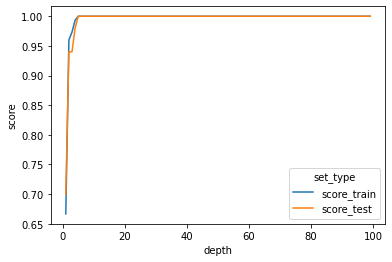

In [63]:
sns.lineplot(x='depth', y='score', hue='set_type', data=scores_data_long)